# Assignment 2- Evaluating Regression Models

authors: 

Objective: 
We are creating an explanatory analysis for our predictions using at least two regression modeling methods from our textbook Chapter 4 of the Géron (2017), Lasso Regression and Linear Regression to determine which machine learning method the firm wants to use to complement conventional methods for assessing the market value of residential real estate. i.e SalePrice

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.shape

(1460, 81)

In [8]:
train.set_index(keys = ["Id"], inplace = True)

In [9]:
# this is going to list all the columns
cols = list(train.columns)
cols.sort()
cols.append(" ") # rounding from 80 to 81 in anticipation for matrix
num = np.array(cols)
# reshaping into matrix
reshaped = num.reshape(9,9)

#now construct a prettier table
pd.DataFrame(reshaped, columns=["" for i in range(0,9)])

,,,,,,,,,
0,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1
1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1
2,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu
3,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual
4,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual
5,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning
6,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual
7,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch
8,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,


In [10]:
proportions = 100 * (round(train.isnull().sum() / len(train), 4))

pd.set_option("display.max_rows", 80, "display.max_columns", 80) 
proportions

pd.reset_option("display.max_rows", "display.max_columns")
proportions

proportions[proportions > 30]

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [11]:
"""
 we will definitely disclude any of the columns listed above for being mostly missings
 further we will take columns we believe to be most helpful for predicting sales price 
 based on our own experience and expertise

"""
mine = ["YearBuilt", "TotRmsAbvGrd", "RoofMatl", "PoolArea", "LotArea", "Neighborhood", "YearRemodAdd", \
        "GarageYrBlt", "HouseStyle", "CentralAir", "Fireplaces", "SalePrice"]

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


CPU times: user 7.27 s, sys: 340 ms, total: 7.61 s
Wall time: 6.81 s


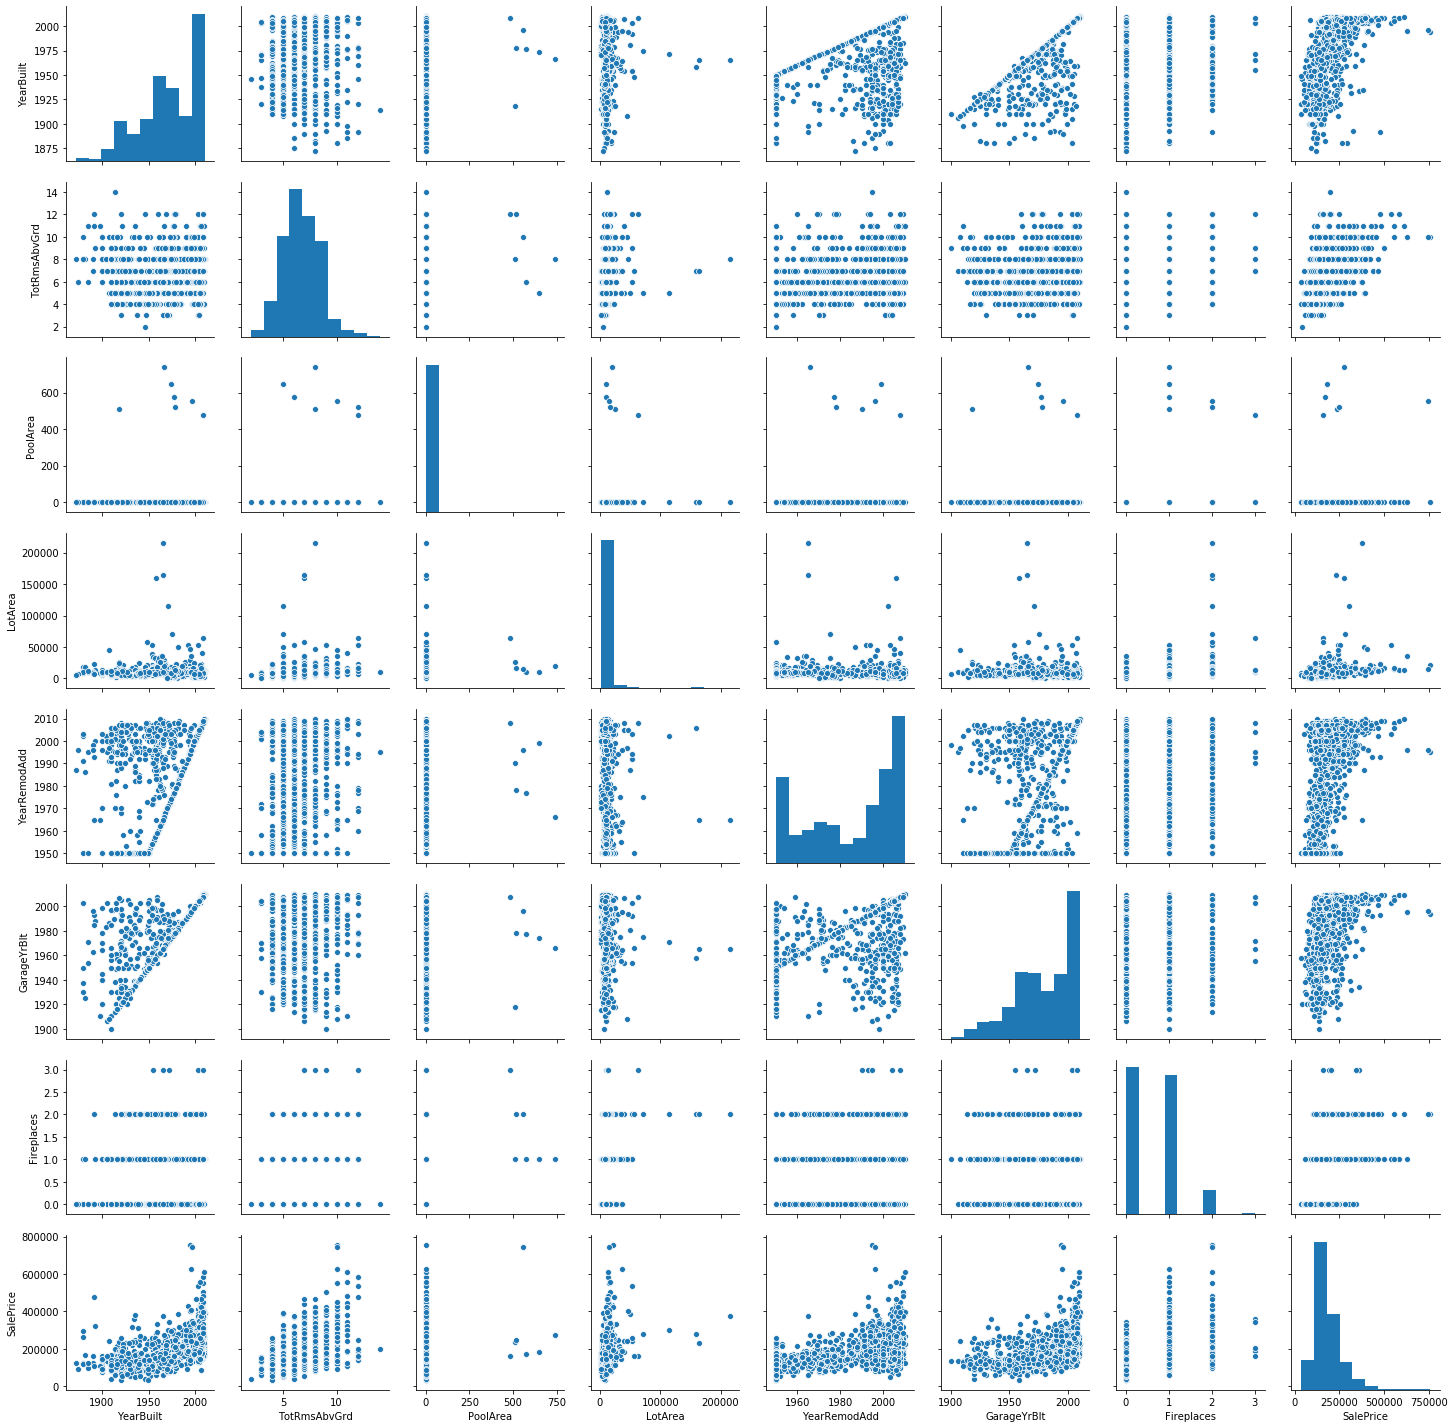

In [12]:
%time seaborn_plot = sns.pairplot(train[mine])

In [13]:
train.drop(columns = ["GarageYrBlt"], inplace = True)

In [14]:
mine.remove("GarageYrBlt")

CPU times: user 2.59 s, sys: 125 ms, total: 2.71 s
Wall time: 2.53 s


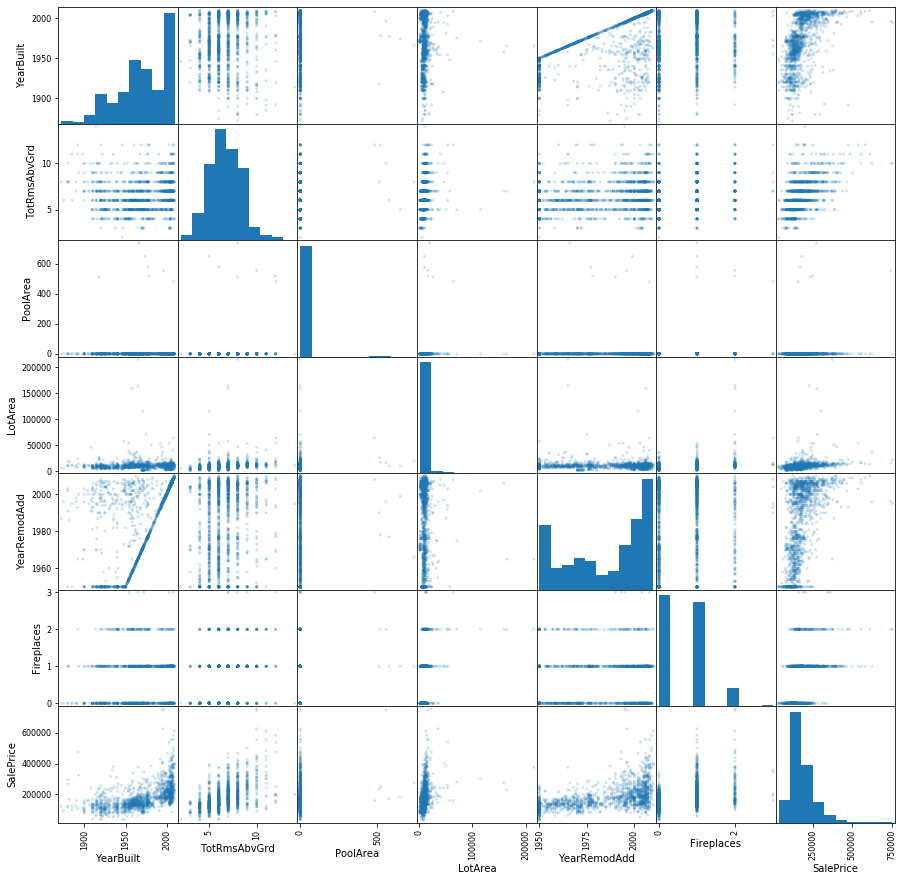

In [15]:
%time pd_plot = pd.plotting.scatter_matrix(train[mine], alpha = 0.2, figsize = (15, 15))

In [16]:
df = train[mine]

In [17]:
df.head()

,YearBuilt,TotRmsAbvGrd,RoofMatl,PoolArea,LotArea,Neighborhood,YearRemodAdd,HouseStyle,CentralAir,Fireplaces,SalePrice
Id,,,,,,,,,,,
1,2003,8,CompShg,0,8450,CollgCr,2003,2Story,Y,0,208500
2,1976,6,CompShg,0,9600,Veenker,1976,1Story,Y,1,181500
3,2001,6,CompShg,0,11250,CollgCr,2002,2Story,Y,1,223500
4,1915,7,CompShg,0,9550,Crawfor,1970,2Story,Y,1,140000
5,2000,9,CompShg,0,14260,NoRidge,2000,2Story,Y,1,250000


In [18]:
# here we see we have no missings
round(df.describe(), 2)

,YearBuilt,TotRmsAbvGrd,PoolArea,LotArea,YearRemodAdd,Fireplaces,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,1971.27,6.52,2.76,10516.83,1984.87,0.61,180921.2
std,30.20,1.63,40.18,9981.26,20.65,0.64,79442.5
min,1872.00,2.00,0.00,1300.00,1950.00,0.00,34900.0
25%,1954.00,5.00,0.00,7553.50,1967.00,0.00,129975.0
50%,1973.00,6.00,0.00,9478.50,1994.00,1.00,163000.0
75%,2000.00,7.00,0.00,11601.50,2004.00,1.00,214000.0
max,2010.00,14.00,738.00,215245.00,2010.00,3.00,755000.0


In [19]:
# this pool looks really big so we'll isolate large pools to see if it makes sense
df[df.PoolArea > 600] # it does

,YearBuilt,TotRmsAbvGrd,RoofMatl,PoolArea,LotArea,Neighborhood,YearRemodAdd,HouseStyle,CentralAir,Fireplaces,SalePrice
Id,,,,,,,,,,,
811,1974,5,CompShg,648,10140,NWAmes,1999,1Story,Y,1,181000
1424,1966,8,Tar&Grv,738,19690,Edwards,1966,SLvl,Y,1,274970


In [20]:
# some categorical and some numerical variables
df.dtypes

YearBuilt        int64
TotRmsAbvGrd     int64
RoofMatl        object
PoolArea         int64
LotArea          int64
Neighborhood    object
YearRemodAdd     int64
HouseStyle      object
CentralAir      object
Fireplaces       int64
SalePrice        int64
dtype: object

In [21]:
predictors = mine
predictors.remove("SalePrice")
predicted = ["SalePrice"]

In [22]:
df.head()

,YearBuilt,TotRmsAbvGrd,RoofMatl,PoolArea,LotArea,Neighborhood,YearRemodAdd,HouseStyle,CentralAir,Fireplaces,SalePrice
Id,,,,,,,,,,,
1,2003,8,CompShg,0,8450,CollgCr,2003,2Story,Y,0,208500
2,1976,6,CompShg,0,9600,Veenker,1976,1Story,Y,1,181500
3,2001,6,CompShg,0,11250,CollgCr,2002,2Story,Y,1,223500
4,1915,7,CompShg,0,9550,Crawfor,1970,2Story,Y,1,140000
5,2000,9,CompShg,0,14260,NoRidge,2000,2Story,Y,1,250000


In [23]:
pd.get_dummies(df.CentralAir)

,N,Y
Id,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
1456,0,1
1457,0,1
1458,0,1


In [24]:
pd.get_dummies(df.HouseStyle)

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
Id,,,,,,,,
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1456,0,0,0,0,0,1,0,0
1457,0,0,1,0,0,0,0,0
1458,0,0,0,0,0,1,0,0


In [25]:
pd.get_dummies(df.RoofMatl)

,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
Id,,,,,,,,
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1456,0,1,0,0,0,0,0,0
1457,0,1,0,0,0,0,0,0
1458,0,1,0,0,0,0,0,0


In [26]:
pd.get_dummies(df.Neighborhood)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
predictors.remove("Neighborhood")

In [28]:
predictors.remove("RoofMatl")

In [29]:
predictors.remove("HouseStyle")

In [30]:
central_dummies = pd.get_dummies(df.CentralAir)

In [31]:
df.drop(columns = ["Neighborhood", "RoofMatl", "HouseStyle", "CentralAir"], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
df = df.join(central_dummies)

In [33]:
df.rename(columns = {"N": "CentralAir_N", "Y": "CentralAir_Y"}, inplace=True)

In [34]:
df

,YearBuilt,TotRmsAbvGrd,PoolArea,LotArea,YearRemodAdd,Fireplaces,SalePrice,CentralAir_N,CentralAir_Y
Id,,,,,,,,,
1,2003,8,0,8450,2003,0,208500,0,1
2,1976,6,0,9600,1976,1,181500,0,1
3,2001,6,0,11250,2002,1,223500,0,1
4,1915,7,0,9550,1970,1,140000,0,1
5,2000,9,0,14260,2000,1,250000,0,1
...,...,...,...,...,...,...,...,...,...
1456,1999,7,0,7917,2000,1,175000,0,1
1457,1978,7,0,13175,1988,2,210000,0,1
1458,1941,9,0,9042,2006,2,266500,0,1


In [35]:
predictors.remove("CentralAir")
predictors.append("CentralAir_N")
predictors.append("CentralAir_Y")

In [47]:
model = LinearRegression()
scores = []
X = df[predictors]
y = df[predicted]

In [37]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    scores.append(round(model.score(X.iloc[test,:], y.iloc[test,:]), 4))
print(scores)

[0.6009, 0.6559, 0.5982, 0.5705, 0.6221, 0.419, 0.6615, 0.6153, 0.618, 0.6646]


In [38]:
mses = []

In [39]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    predicted_y = model.predict(X) # yielding a list of SalePrice predictions
    train_mse = mean_squared_error(y, predicted_y) # y_true, y_pred
    mses.append(train_mse)
print(mses)

[2446611532.5640216, 2424868699.4600244, 2419113624.6553135]


In [71]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
model = Ridge(alpha=0.4)

In [72]:
scores = []
mses = []
X = df[predictors]
y = df[predicted]
# X and y are same

In [73]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    scores.append(round(model.score(X.iloc[test,:], y.iloc[test,:]), 4))
print(scores)

[0.6008, 0.6559, 0.5982, 0.5705, 0.6221, 0.419, 0.6615, 0.6152, 0.618, 0.6646]


In [74]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    predicted_y = model.predict(X) # yielding a list of SalePrice predictions
    train_mse = mean_squared_error(y, predicted_y) # y_true, y_pred
    mses.append(train_mse)
print(mses)

[2446629903.867889, 2424867009.897142, 2419106780.0362687]
